<a href="https://colab.research.google.com/github/Laharipriya-coder/Spam-filter/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import random
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


In [21]:
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Unique labels: {np.unique(y_train)}")

Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


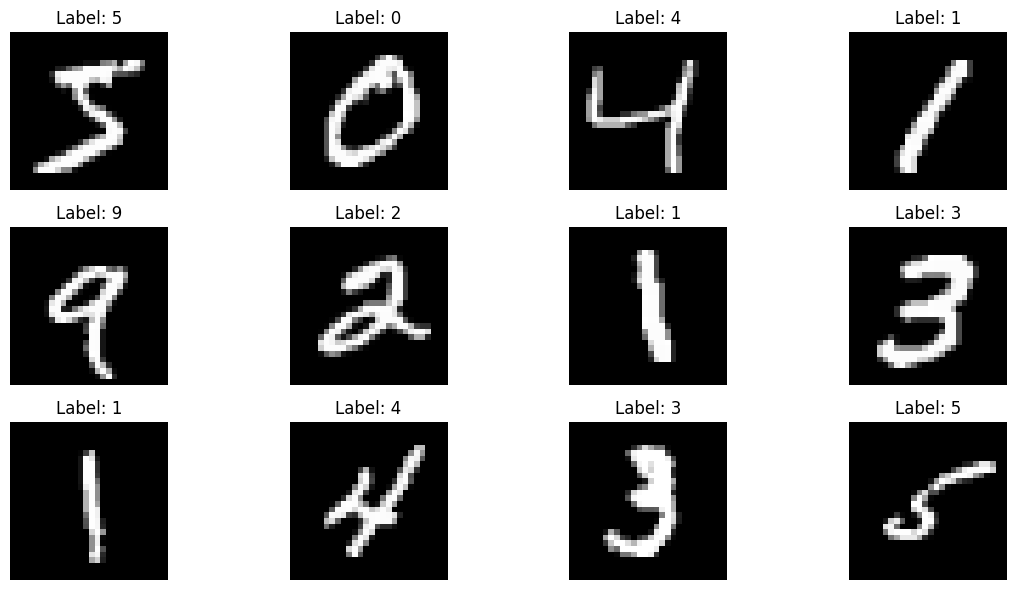

In [22]:
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)
print(f"After reshaping - Training data: {x_train.shape}")
print(f"After reshaping - Test data: {x_test.shape}")

After reshaping - Training data: (60000, 28, 28, 1)
After reshaping - Test data: (10000, 28, 28, 1)


In [24]:
def create_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model
model = create_cnn_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Model compiled successfully!")

Model compiled successfully!


In [26]:
print("Starting training...")
history = model.fit(
    x_train, y_train_categorical,
    batch_size=128,
    epochs=5,
    validation_data=(x_test, y_test_categorical),
    verbose=1
)
print("Training completed!")

Starting training...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 105ms/step - accuracy: 0.7407 - loss: 0.7989 - val_accuracy: 0.9773 - val_loss: 0.0700
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.9582 - loss: 0.1383 - val_accuracy: 0.9850 - val_loss: 0.0510
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9728 - loss: 0.0950 - val_accuracy: 0.9887 - val_loss: 0.0343
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9805 - loss: 0.0664 - val_accuracy: 0.9902 - val_loss: 0.0312
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.9840 - loss: 0.0573 - val_accuracy: 0.9899 - val_loss: 0.0301
Training completed!


In [27]:
print("Evaluating model on test data...")
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Evaluating model on test data...
Test Accuracy: 0.9899
Test Loss: 0.0301


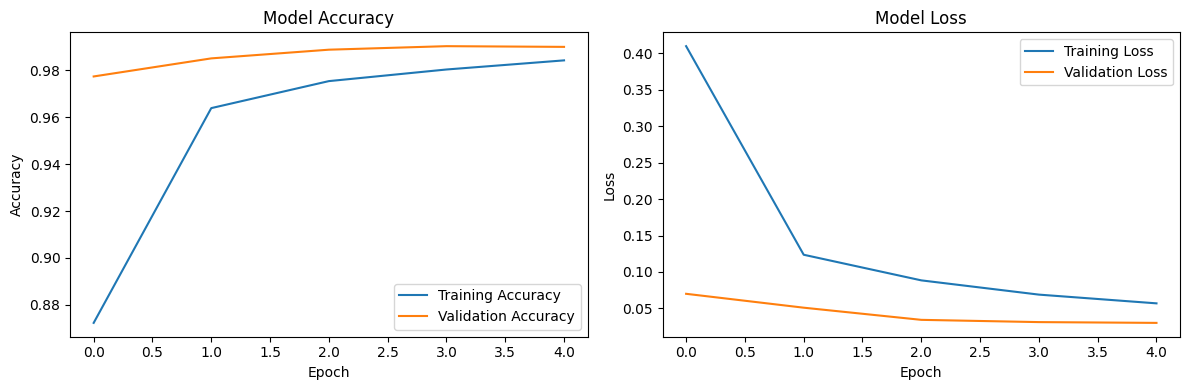

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


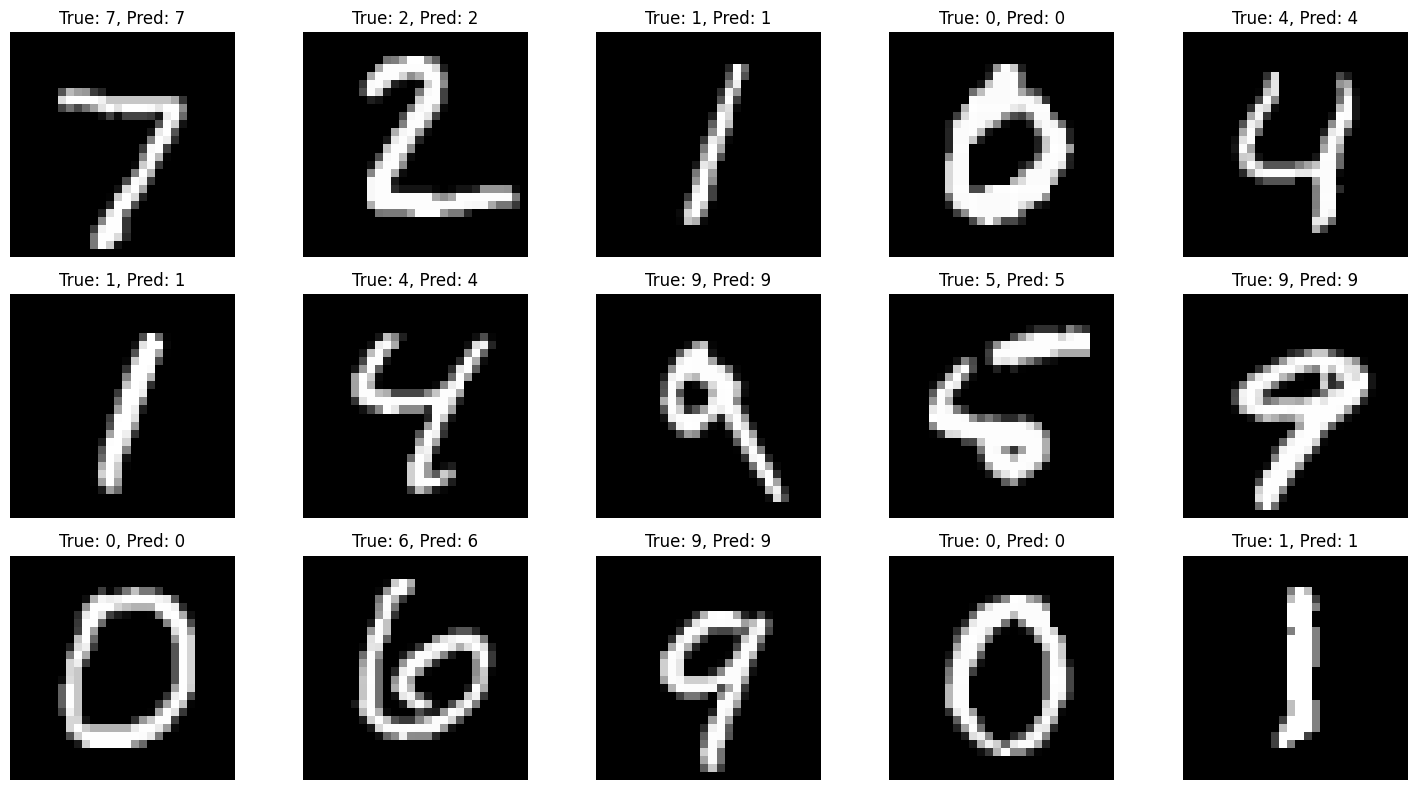

In [29]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(15, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
model.save('handwritten_digit_model.h5')
print("Model saved as 'handwritten_digit_model.h5'")
from google.colab import files
files.download('handwritten_digit_model.h5')

Model saved as 'handwritten_digit_model.h5'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>